<a href="https://colab.research.google.com/github/RickMLS1/Data-Science/blob/main/Lista_3_de_CD_Rick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
%matplotlib inline

# **Questão 1 (2 pontos)**


---



Colete 2 bases de dados diferentes na internet e utilize a biblioteca *pymfe* para extrair as metafeatures de cada uma, depois calcule a distância euclidiana de cada base e mostre quais são as mais próximas.



Dica: utilize sites como o openML e o kaggle para obter as bases de dados e olhe a documentação da biblioteca em https://pypi.org/project/pymfe/

In [ ]:
!pip install pymfe



*   EPL 21/22 DATASET
    https://www.kaggle.com/datasets/azminetoushikwasi/epl-21-22-matches-players




In [ ]:
from pymfe.mfe import MFE
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('all_players_stats.csv')
data = np.array(data)

mfe = MFE()
mfe.fit(data)
ft1 = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft1[0], ft1[1])))

attr_conc.mean                                                 0.1370368723483866
attr_conc.sd                                                  0.28799649530864097
attr_ent.mean                                                  3.0370849101437702
attr_ent.sd                                                    2.4902577225245164
attr_to_inst                                                 0.016051364365971106
cat_to_num                                                    0.42857142857142855
cor.mean                                                    0.0036338226346743115
cor.sd                                                       0.012981365743756591
cov.mean                                                    0.0014596689964956582
cov.sd                                                        0.29195911433071564
eigenvalues.mean                                               0.9236474261163542
eigenvalues.sd                                                  17.45705502460796
g_mean.mean     


*   Cristiano Ronaldo | All Club Goals



https://www.kaggle.com/datasets/azminetoushikwasi/cr7-cristiano-ronaldo-all-club-goals-stats



In [ ]:
data = pd.read_csv('data.csv')
data = data.dropna()
data = np.array(data)

mfe = MFE()
mfe.fit(data)
ft2 = mfe.extract()
print("\n".join("{:50} {:30}".format(x, y) for x, y in zip(ft2[0], ft2[1])))

attr_conc.mean                                                0.23502732832863846
attr_conc.sd                                                  0.27646783934588065
attr_ent.mean                                                   4.002646440439726
attr_ent.sd                                                      2.32499420544497
attr_to_inst                                                 0.030952380952380953
cat_to_num                                                                    nan
cor.mean                                                      0.01448562358761528
cor.sd                                                       0.046088511797568586
cov.mean                                                    0.0002320424632267333
cov.sd                                                      0.0011122075180375036
eigenvalues.mean                                             0.012895707145900789
eigenvalues.sd                                                0.04114431712294254
g_mean.mean     

Calculando distância Euclidiana

In [52]:
import numpy as np
from scipy.spatial.distance import cdist, squareform

ft1 = np.array(ft1[1])
ft2 = np.array(ft2[1])

print(f'Distância euclidiana entre o dataset EPL 21/22 e o dataset Cristiano Ronaldo: {np.sqrt(np.nansum((ft1[1]-ft2[1])**2))}')

Distância euclidiana entre o dataset EPL 21/22 e o dataset Cristiano Ronaldo: 0.011528655962760315


# **Questão 2 (0,5 ponto)**



---


Qual a importância de usar as metafeatures para obter informações das bases de dados durante o processo de recomendação de algoritmos?

*É importante a utilização das metafeatures pois com elas podemos entender melhor o dataset com o qual estamos trabalhando, entender melhor seu viés de aprendizado ajuda na criação de sistemas de recomendação ou de datamining*

# **Questão 3 (0,5 ponto)**



---



Explique como o SVM utiliza o Kernel Trick.

*Para que possamos treinar um svm para classificação temos que fazer operações com vetores que possuem muitas dimensões, e, no mundo real, pode acontecer de termos atributos que para aplicarmos transformações seriam necessárias várias combinações polinomias o que levaria a um custo computacional bastante elevado. O kernel trick nos dá uma solução para esse tipo de problema. Basicamente, os métodos do kernel representam os dados através de comparações de pares de similaridade entre os dados reais, que tem as coordenadas originais do espaço de dimensão menor, ao invés de explicitamente aplicar transformações e representar esses dados por essas coordenadas transformadas no feature space de maior dimensão. O principal benefício do kernel trick é que a função objetiva que estamos otimizando para ajustar o meio de decisão do espaço de dimensão maior só inclui produtos escalares dos vetores transformados dos atributos. Ou seja, nos podemos substituir esses produtos escalares pela função do kernel.*

# **Questão 4 (0,5 ponto)**


---



Como os hiperparâmetros C, Gamma e Kernel influenciam no funcionamento e interpretação do SVM ?

*Ao se treinar um SVM com a função de kernel RBF, o paramêtro c, que é comum a todos os kernels, é resposavel por escolher entre a classificação errada de exemplos de treinamento e a simplicidade da superfície de decisão. Um valor baixo de C faz com que a superfície de decisão seja suave, enquanto um valor alto de C tenta classificar todos os exemplos de treinamento corretamente. Já o paramêtro gama define quanta influência um exemplo de treinamento tem. Quanto maior o gamma é, mais perto outros exemplos serão afetados*

# **Questão 5 (1,5 ponto)**


---



Escolha uma base de dados de classificação de sua preferência e utilize o método Grid Search para encontrar os melhores hiperparametros do SVM para a base de dados.

**GRIND SEARCH**

In [45]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
 

#Lendo os dados
digits = load_digits()

X = pd.DataFrame(digits['data'],
                      columns = digits['feature_names'])
 
Y = pd.DataFrame(digits['target'],
                   columns =['Digits'])


 
X_train, X_test, y_train, y_test = train_test_split(
                        X, np.ravel(Y),
                test_size = 0.25, random_state = 42)


# Definindo o range de parametros
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting
grid.fit(X_train, y_train)

# Melhores parametros
print(grid.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.107 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.107 total time=   0.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.2s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.2s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.108 total time=   0.2s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.107 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.107 total time=   0.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.108 total time=   0.2s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.108 total time=   0.2s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.108 total time=   0.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.107 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

**MELHORES PARAMETROS**

In [46]:
grid_predictions = grid.predict(X_test)

print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.98      1.00      0.99        59
           6       1.00      1.00      1.00        45
           7       0.98      0.98      0.98        41
           8       0.97      1.00      0.99        38
           9       0.98      0.98      0.98        48

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



# **Questão 6 (1 ponto)**


---

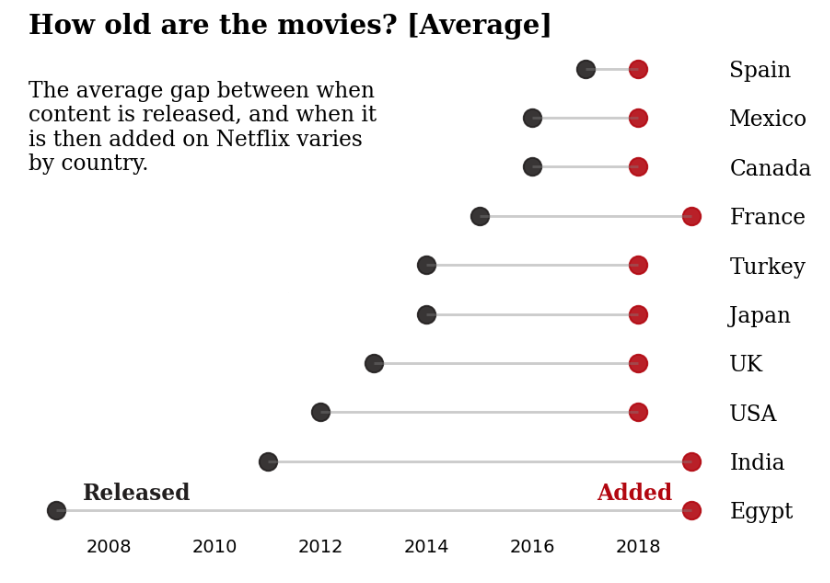


Tendo como base a imagem acima, essa é uma boa representação desse tipo de dado? Descreva como essa forma de visualização de dados pode ser comparada com um gráfico semelhante de barras.

(Obs: Os valores utilizados das coordenadas são do valor médio de ano de lançamento e ano de adição à Netflix.)

---

**Base de dados e gráficos utilizados:** [Netflix Data Visualization](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization/notebook)


*Esse tipo de representação é bastante informativa pois mostra através do tempo como esse dado se comporta, no caso de um gráfico de barras a representação estaria mais relacionada com a grandeza da quantidade, já nesse tipo de vizualização podemos perceber claramente a passagem de tempo e fazer análises em cima dela.*

# **Questão 7 (0,5 ponto)**


---

A partir da questão anterior, quais conclusões podemos tirar a partir de uma análise desse gráfico?

*Podemos perceber que, dos países analisados, a Espanha é o que possui filmes recém lançados sendo colocados na Netflix mais rapidamente, seguido de Canadá e México. Uma análise possível seria que países como Egito e India possuem primariamente em seu catálogo filmes mais antigos, enquanto os 3 países citados anteriormente possuem mais filmes recentemente lançados.*

# **Questão 8 (1,5 ponto)**


---



Elabore um Diagrama de Pareto com a base `videogame_sales.csv`.

Utilize 2 colunas desejadas entre `Developer`, `Rating`, `Publisher` e `Genre` com os valores desejados e faça uma avaliação a partir do seu diagrama gerado.

Por exemplo, avalie a coluna `Developer` a partir do `Rating == E`.

**Obs: recomendado utilizar só uma pequena porção dos dados. Como no exemplo acima, utilizar somente os 10 `Developers` mais frequentes na base com `Rating == E` ao invés de todos.**

**Para mais informações sobre como esse diagrama funciona, aqui vão alguns lins:**

* [Diagrama de Pareto](https://ferramentasdaqualidade.org/diagrama-de-pareto/)
* [Gestão de processos - O que é um Diagrama de Pareto? [Com exemplos]](https://blog.zeev.it/diagrama-de-pareto/)
* [Diagrama de Pareto - Wikipédia](https://pt.wikipedia.org/wiki/Diagrama_de_Pareto)

In [ ]:
data = pd.read_csv("videogame_sales.csv")
columns = ['Rating', 'Genre']
data = data[columns]
data = data.dropna()
data = data[data['Rating'] == 'M']
data

,Rating,Genre
16,M,Action
17,M,Action
23,M,Action
24,M,Action
29,M,Shooter
...,...,...
16622,M,Adventure
16651,M,Action
16676,M,Action
16677,M,Fighting


In [ ]:
data['Genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Adventure', 'Fighting',
       'Racing', 'Platform', 'Sports', 'Misc', 'Strategy', 'Simulation'],
      dtype=object)

In [ ]:
df = {'Action' : data[data['Genre'] == 'Action'].shape[0], 'Shooter': data[data['Genre'] == 'Shooter'].shape[0], 'Role-Playing': data[data['Genre'] =='Role-Playing'].shape[0], 
     'Adventure': data[data['Genre'] == 'Adventure'].shape[0], 'Fighting': data[data['Genre'] == 'Fighting'].shape[0],
       'Racing': data[data['Genre'] == 'Racing'].shape[0], 'Platform': data[data['Genre'] == 'Platform'].shape[0], 'Sports': data[data['Genre'] == 'Sports'].shape[0]
      ,'Misc' : data[data['Genre'] == 'Misc'].shape[0], 'Strategy': data[data['Genre'] == 'Strategy'].shape[0], 'Simulation': data[data['Genre'] == 'Simulation'].shape[0]}

df = pd.DataFrame.from_dict(df, orient='index')
df.columns= ['Genre']

In [ ]:
df = df.sort_values(by='Genre', ascending=False)


df["cum_percentage"] = round(df["Genre"].cumsum()/df["Genre"].sum()*100,2)

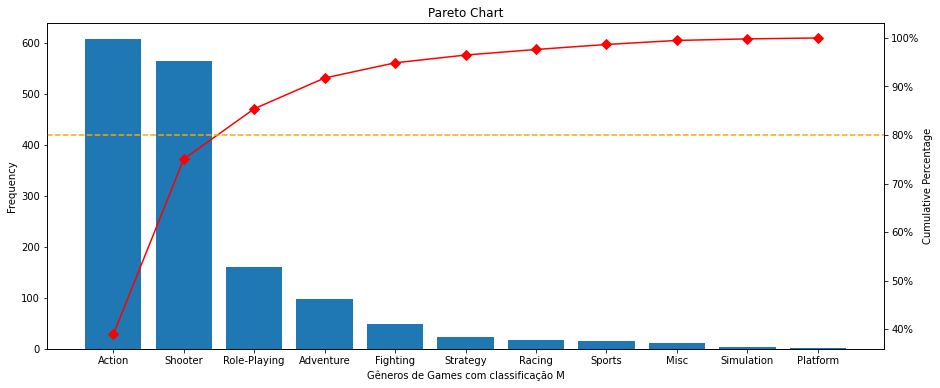

In [ ]:
from matplotlib.ticker import PercentFormatter


fig, ax = plt.subplots(figsize=(15,6))


ax.bar(df.index, df["Genre"])
ax.set_title("Pareto Chart")
ax.set_xlabel("Gêneros de Games com classificação M")
ax.set_ylabel("Frequency");


ax2 = ax.twinx()
ax2.plot(df.index, df["cum_percentage"], color="red", marker="D", ms=7)
ax2.axhline(80, color="orange", linestyle="dashed")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylabel("Cumulative Percentage");

# **Questão 9 (2 pontos)**


---


Usando a base de dados `sales_ts.csv`, quais conclusões podem ter tiradas de uma avaliação desses dados? Qual a sua tendência e sazonalidade?